## Wrangle Crime tables

Goal: A single crime table that records crime amounts for each university.

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
# load the list of dataframes from pickle

with open('df_list_all.pk1', 'r') as picklefile:
    df_list = pickle.load(picklefile)

In [7]:
# make sure that all of the first 12 columns are the same
# I don't want to unclude tables 19 through 22 (23 total)
# I'll start with the first 19

first_cols = list(df_list[0].columns[0:12])

def change_cols(df, n):
    '''
    iterates over the first n columns and 
    changes them according to a present list
    '''
    for i in range(0, n):
        df.rename(columns= {df.columns[i]: first_cols[i]}, inplace=True)
        return df

# placeholder list for new columns
df_list_ncols = []
for i in range(0,19):
    df = change_cols(df_list[i], 12)
    df_list_ncols.append(df)



In [8]:
# check to see if the new columns are correct
for i in range(0,len(df_list)):
    print i, df_list[0].iloc[:,0:12].columns.equals(df_list[i].iloc[:,0:12].columns)

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 False
20 False
21 False
22 True


In [9]:
df_list_cut = df_list

In [10]:
del df_list_cut[19:22]
for i in range(0,len(df_list_cut)):
    print i, df_list_cut[0].iloc[:,0:12].columns.equals(df_list_cut[i].iloc[:,0:12].columns)

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True


In [11]:
print first_cols

[u'UNITID_P', u'INSTNM', u'BRANCH', u'Address', u'City', u'State', u'ZIP', u'sector_cd', u'Sector_desc', u'men_total', u'women_total', u'Total']


In [48]:
big_df = df_list_cut[0]

for i in range(1, len(df_list_cut)-1):
    big_df = big_df.join(df_list_cut[i], on=first_cols, how='inner')
    print len(big_df.columns)

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [55]:
big_df = pd.concat(df_list_cut, join='inner', index=first_cols, axis=1)

TypeError: concat() got an unexpected keyword argument 'index'

In [51]:
print len(big_df)
print len(big_df.columns)

11229
1134


In [52]:
#with open('big_crime_df.pk1', 'w') as picklefile:
    pickle.dump(big_df, picklefile)

In [54]:
big_df.head()

UNITID_P                                       \
    UNITID_P                               INSTNM   
0  100654001             Alabama A & M University   
1  100663001  University of Alabama at Birmingham   
2  100663002  University of Alabama at Birmingham   
3  100690001                   Amridge University   
4  100706001  University of Alabama in Huntsville   

                                       \
                               BRANCH   
0                         Main Campus   
1                         Main Campus   
2  Huntsville Regional Medical Campus   
3                         Main Campus   
4                         Main Campus   

                                                                        \
                                             Address        City State   
0                                   4900 MERIDIAN ST      NORMAL    AL   
1  ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...  BIRMINGHAM    AL   
2                             301 Governors Drive SW  Huntsville    AL   
3                                     1200 TAYLOR RD  MONTGOMERY    AL   
4                                    301 SPARKMAN DR  HUNTSVILLE    AL   

                                                                       ...     \
         ZIP sector_cd                         Sector_desc men_total   ...      
0      35762         1             Public, 4-year or above      2268   ...      
1  352940110         1             Public, 4-year or above      7309   ...      
2      35801         1             Public, 4-year or above      7309   ...      
3  361173553         2  Private nonprofit, 4-year or above       264   ...      
4      35899         1             Public, 4-year or above      4136   ...      

     Total                                                                   \
  VANDAL13 VANDAL_RAC13 VANDAL_REL13 VANDAL_SEX13 VANDAL_GEN13 VANDAL_DIS13   
0        0            0            0            0            0            0   
1        0            0            0            0            0            0   
2        0            0            0            0            0            0   
3        0            0            0            0            0            0   
4        0            0            0            0            0            0   

                                           
  VANDAL_ETH13 FILTER11 FILTER12 FILTER13  
0            0        1        1        1  
1            0        1        1        1  
2            0        1        1        1  
3            0        1        1        1  
4            0        1        1        1  

[5 rows x 1134 columns]

In [12]:
df_list_newindex = []
for df in df_list_cut:
    df_list_newindex.append(df.set_index(keys=first_cols))

In [13]:
big_df = pd.concat(df_list_newindex, axis=1, join='inner')

In [14]:
print len(big_df)
print len(big_df.columns)
big_df.head()

11152
1650


,,,,,,,,,,,,WEAPON11,DRUG11,LIQUOR11,WEAPON12,DRUG12,LIQUOR12,WEAPON13,DRUG13,LIQUOR13,FILTER11,...,VANDAL13,VANDAL_RAC13,VANDAL_REL13,VANDAL_SEX13,VANDAL_GEN13,VANDAL_DIS13,VANDAL_ETH13,FILTER11,FILTER12,FILTER13
UNITID_P,INSTNM,BRANCH,Address,City,State,ZIP,sector_cd,Sector_desc,men_total,women_total,Total,,,,,,,,,,,,,,,,,,,,,
100654001,Alabama A & M University,Main Campus,4900 MERIDIAN ST,NORMAL,AL,35762,1,"Public, 4-year or above",2268,2752,5020,NaN,NaN,NaN,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
100663001,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Street So",BIRMINGHAM,AL,352940110,1,"Public, 4-year or above",7309,11259,18568,0,7,0,NaN,NaN,NaN,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
100663002,University of Alabama at Birmingham,Huntsville Regional Medical Campus,301 Governors Drive SW,Huntsville,AL,35801,1,"Public, 4-year or above",7309,11259,18568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
100690001,Amridge University,Main Campus,1200 TAYLOR RD,MONTGOMERY,AL,361173553,2,"Private nonprofit, 4-year or above",264,367,631,0,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
100706001,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,HUNTSVILLE,AL,35899,1,"Public, 4-year or above",4136,3240,7376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,1,1,1


In [15]:
#with open('big_crime_df.pk1', 'w') as picklefile:
    pickle.dump(big_df, picklefile)

In [ ]:
#with open('big_crime_df.pk1', 'r') as picklefile:
    

In [17]:
col13 = []

for col in big_df.columns:
    if col.endswith('13'):
        col13.append(str(col))

len(col13)

550

In [40]:
big_df_13 = big_df[col13]

In [21]:
#with open('big_crime_df_13.pk1', 'w') as picklefile:
    pickle.dump(big_df_13, picklefile)

In [41]:
print len(big_df_13)
print len(big_df_13.columns)
big_df_13.drop('FILTER13', 1, inplace=True)
print len(big_df_13)
print len(big_df_13.columns)

11152
3650
11152
3250


/Users/johnkeating/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
len(big_df_13.columns)

3250

In [45]:
print list(big_df_13.columns)

[u'WEAPON13', u'WEAPON13', u'WEAPON13', u'WEAPON13', u'WEAPON13', u'WEAPON13', u'WEAPON13', u'WEAPON13', u'WEAPON13', u'WEAPON13', u'DRUG13', u'DRUG13', u'DRUG13', u'DRUG13', u'DRUG13', u'DRUG13', u'DRUG13', u'DRUG13', u'DRUG13', u'DRUG13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'LIQUOR13', u'MURD13', u'MURD13', u'MURD13', u'MURD13', u'MURD13', u'MURD13', u'MURD13', u'MURD13', u'MURD13', u'MURD13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'NEG_M13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'FORCIB13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'NONFOR13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'ROBBE13', u'AGG_A13', u'AGG_A

In [47]:
big_transpose = big_df_13.T

In [62]:
big_transpose.isnull().sum().values[0:18]

array([ 810,  810, 2030, 1420, 1420,  810,  810, 2030, 1420, 1420, 2030,
       1420,  810,  810, 1420, 1420, 1420, 2030])

In [49]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

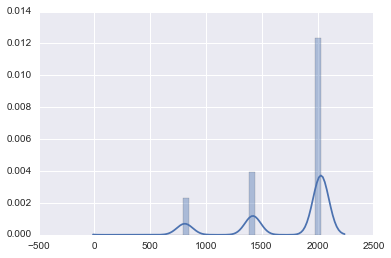

In [57]:
sns.distplot(big_transpose.isnull().sum().values)

In [51]:
nans = big_transpose.isnull().sum()

In [66]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print len(set(nans))
print set(nans)
print len(nans.values==810)
print len(nans<1000)

4
set([200, 810, 1420, 2030])
11152
11152


In [68]:
big_df_13.isnull().sum()

WEAPON13         8391
WEAPON13         8391
WEAPON13            0
WEAPON13            0
WEAPON13            0
WEAPON13            0
WEAPON13        11148
WEAPON13        11148
WEAPON13         8769
WEAPON13         8769
DRUG13           8391
DRUG13           8391
DRUG13              0
DRUG13              0
DRUG13              0
DRUG13              0
DRUG13          11148
DRUG13          11148
DRUG13           8769
DRUG13           8769
LIQUOR13         8391
LIQUOR13         8391
LIQUOR13            0
LIQUOR13            0
LIQUOR13            0
LIQUOR13            0
LIQUOR13        11148
LIQUOR13        11148
LIQUOR13         8769
LIQUOR13         8769
                ...  
VANDAL_RAC13     8391
VANDAL_RAC13        0
VANDAL_RAC13        0
VANDAL_RAC13    11148
VANDAL_RAC13     8769
VANDAL_REL13     8391
VANDAL_REL13        0
VANDAL_REL13        0
VANDAL_REL13    11148
VANDAL_REL13     8769
VANDAL_SEX13     8391
VANDAL_SEX13        0
VANDAL_SEX13        0
VANDAL_SEX13    11148
VANDAL_SEX

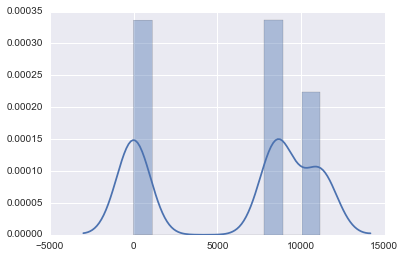

In [69]:
sns.distplot(big_df_13.isnull().sum())

In [70]:
for df in df_list_cut:
    
    print df.isnull().sum()

UNITID_P          0
INSTNM            0
BRANCH            0
Address           0
City              0
State           195
ZIP              42
sector_cd         0
Sector_desc       0
men_total        41
women_total      41
Total            41
WEAPON11       8700
DRUG11         8700
LIQUOR11       8700
WEAPON12       8454
DRUG12         8454
LIQUOR12       8454
WEAPON13       8459
DRUG13         8459
LIQUOR13       8459
FILTER11          0
FILTER12          0
FILTER13          0
dtype: int64
UNITID_P          0
INSTNM            0
BRANCH            0
Address           0
City              0
State           195
ZIP              42
sector_cd         0
Sector_desc       0
men_total        41
women_total      41
Total            41
MURD11         8700
NEG_M11        8700
FORCIB11       8700
NONFOR11       8700
ROBBE11        8700
AGG_A11        8700
BURGLA11       8700
VEHIC11        8700
ARSON11        8700
MURD12         8457
NEG_M12        8457
FORCIB12       8458
NONFOR12       8408
ROBBE12